In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Assuming the file is named 'Grocery_sales.csv'
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Try reading the file with ISO-8859-1 encoding
df = pd.read_csv(file_name, encoding='ISO-8859-1')

# Display the first few rows of the dataframe to confirm it's loaded correctly
print(df.head())


Saving Grocery_Sales.csv to Grocery_Sales.csv
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


**Check for Missing Values**

In [ ]:
# Check the percentage of missing values in each column
missing_values = df.isnull().mean() * 100
print(missing_values)


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


Description (0.268% missing): Since the percentage is very low, I consider removing rows with missing descriptions, unless the description is crucial for later analysis and can be reasonably imputed from other data (like StockCode).

CustomerID (24.927% missing): This is significant and problematic since CustomerID is crucial for any customer segmentation and behavioral analysis. Instead of removing these rows, I consider imputation strategies if there's a way to infer CustomerID from other data (unlikely in many cases) or treat these as representing guest checkouts or one-time customers in your analysis.

**Python Code to Handle Missing Values**

In [ ]:
# Removing rows where 'Description' is missing
df = df.dropna(subset=['Description'])
df = df.dropna(subset=['CustomerID'])

In [ ]:
# Removing rows where 'Description' is missing
# Check if 'Description' column exists, and if not, print available columns
if 'Description' not in df.columns:
    print(f"'Description' column not found. Available columns: {df.columns}")
else:
    df = df.dropna(subset=['Description'])

# Similar check for 'CustomerID'
if 'CustomerID' not in df.columns:
    print(f"'CustomerID' column not found. Available columns: {df.columns}")
else:
    df = df.dropna(subset=['CustomerID'])


# Save the cleaned dataset

In [ ]:
import os

# Create the directory if it doesn't exist
desktop_path = os.path.expanduser("~/Desktop")  # Use ~ to get the home directory
file_path = os.path.join(desktop_path, "Refined_Dataset.csv")

os.makedirs(desktop_path, exist_ok=True)

# Now save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

**2. Remove Duplicates**
Duplicates may not have been mentioned, but it's good practice to check:

In [ ]:
# Remove duplicates, considering all columns to define a duplicate
df = df.drop_duplicates()

# If duplicates should be checked based on specific columns, for example, InvoiceNo and StockCode
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode'])


**3. Validate Data Accuracy**
Look for anomalies or outliers in Quantity and UnitPrice which can affect your analysis:

**Python Code to Check for Outliers**

In [ ]:
# Descriptive statistics to understand the distribution
print(df[['Quantity', 'UnitPrice']].describe())

# Optionally, remove extreme outliers, e.g., quantities and prices that are three standard deviations from the mean
mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()
mean_unit_price = df['UnitPrice'].mean()
std_unit_price = df['UnitPrice'].std()

df = df[(df['Quantity'] < mean_quantity + 3 * std_quantity) & (df['Quantity'] > mean_quantity - 3 * std_quantity)]
df = df[(df['UnitPrice'] < mean_unit_price + 3 * std_unit_price) & (df['UnitPrice'] > mean_unit_price - 3 * std_unit_price)]


            Quantity      UnitPrice
count  396681.000000  396681.000000
mean       12.278299       3.454548
std       251.820419      69.752711
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000


**Standardize Data Formats**
Ensure that all date fields are in a consistent format:

**4. Standardize Data Formats**
Ensure that all date fields are in a consistent format:

In [ ]:
# Convert InvoiceDate from string to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<ipython-input-8-f9c358519c3f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


**5. Feature Engineering**
This is an opportunity to create meaningful attributes that could aid in analysis:

In [ ]:
# Adding a new feature: Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Save the dataset with new features
df.to_csv(file_path, index=False)


In [ ]:
## Export cleaned and processed data to a new CSV file
df.to_csv('processed_data.csv', index=False)



# Exploratory Data Analysis (EDA) Overview
The goal of EDA is to:

Obtain an understanding of the dataset's characteristics.

1.  Identify patterns, anomalies, or relationships among the data points.
2.   Prepare data for modeling and other analysis.




In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Display the data types of each column
print(df.dtypes)

# Get a concise summary of the DataFrame
df.info()


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
InvoiceNo              object
StockCode              object
Description            object
Quantity                int

# **Step 3: Descriptive Statistics**
Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution.

In [ ]:
# Descriptive statistics for numerical features
print(df.describe())

# Descriptive statistics for categorical features
print(df.describe(include=['object', 'bool']))


            Quantity                    InvoiceDate      UnitPrice  \
count  396361.000000                         396361  396361.000000   
mean       11.750109  2011-07-10 04:52:06.234316544       2.994900   
min      -720.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 14:25:00       1.250000   
50%         5.000000            2011-07-29 11:25:00       1.950000   
75%        12.000000            2011-10-19 15:29:00       3.750000   
max       760.000000            2011-12-09 12:50:00     208.340000   
std        30.360002                            NaN       4.397818   

          CustomerID     TotalPrice  
count  396361.000000  396361.000000  
mean    15275.594148      20.368336  
min     12347.000000   -4522.500000  
25%     13924.000000       4.350000  
50%     15133.000000      11.800000  
75%     16779.000000      19.800000  
max     18287.000000    4522.500000  
std      1714.145269      61.278072  
       InvoiceNo StockCode 

# **Step 4: Missing Values**
Identify and count missing values in each column.

In [ ]:
# Count missing values in each column
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


# **Step 5: Unique Values**
Check for unique values to understand the diversity of data in each column, especially for categorical data.

In [ ]:
# Print the number of unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


InvoiceNo: 22015 unique values
StockCode: 3682 unique values
Description: 3893 unique values
Quantity: 352 unique values
InvoiceDate: 20321 unique values
UnitPrice: 504 unique values
CustomerID: 4357 unique values
Country: 37 unique values
TotalPrice: 3791 unique values


# **Step 6: Data Visualization**
Visualize data distributions and relationships between features.

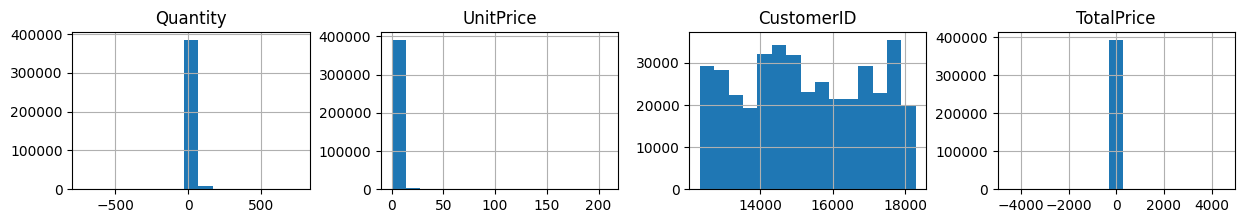

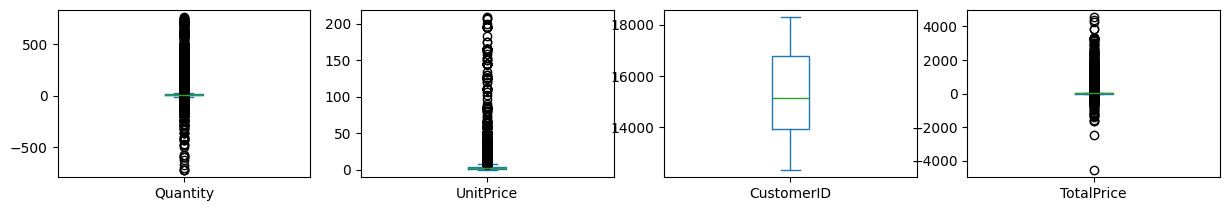

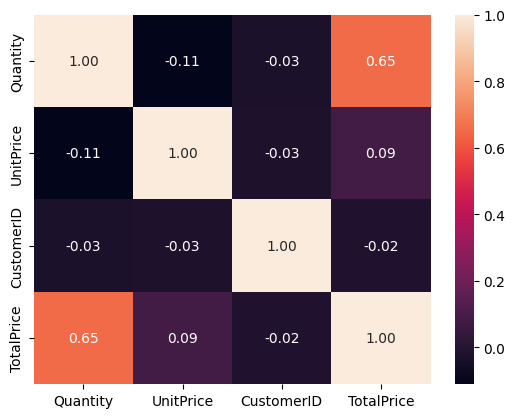

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns

# Histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

# Box plots for numerical features to identify outliers
df[numerical_features].plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

# Correlation matrix heatmap for numerical features only
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f")
plt.show()

# Print the available columns in your DataFrame
print(df.columns)

# Replace 'Feature1', 'Feature2', 'Feature3' with actual column names from your DataFrame
# Assuming 'Quantity', 'UnitPrice', 'CustomerID', and 'Country'

# **Step 7: Explore Relationships and Patterns**
Examine the relationships between features, focusing on how they relate to customer behaviors.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


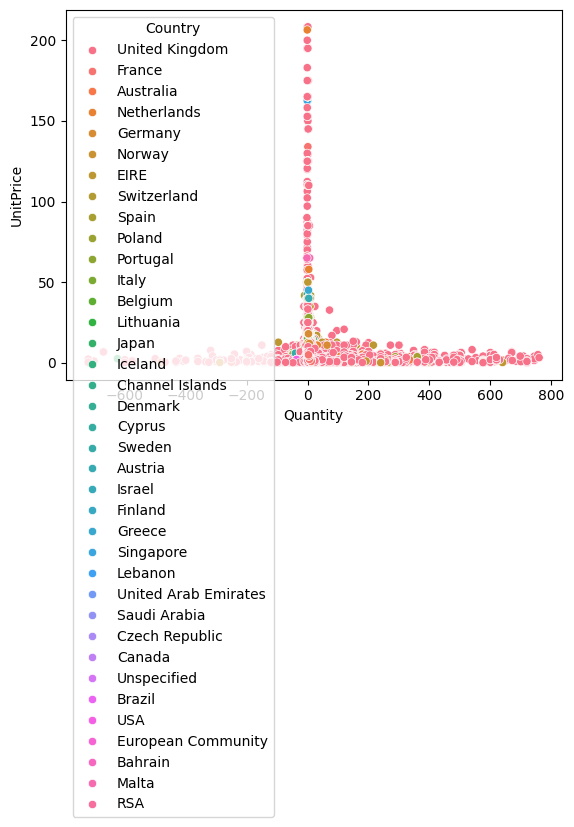

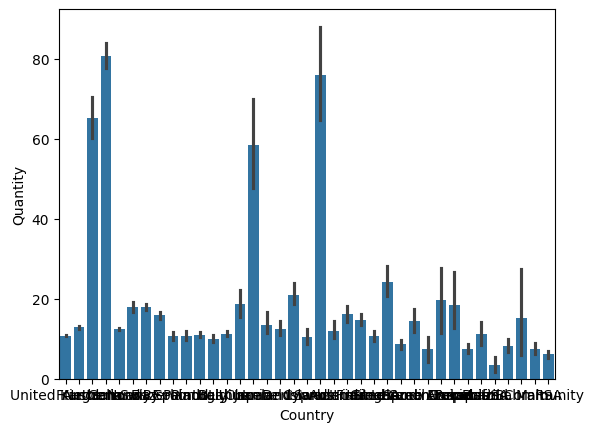

In [ ]:


# Print the available columns in your DataFrame to verify their names
print(df.columns)

# Replace 'Feature1', 'Feature2', 'Target' with actual column names
# from the output of the previous line. For example:
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Country', data=df)
plt.show()

# Similarly, adjust the column names in the bar chart code as needed:
sns.barplot(x='Country', y='Quantity', data=df)  # Example
plt.show()

### **Analysis of Purchase Quantities by Country**

# **# Overview of Results:**
 The bar chart visualization provides a clear depiction of the distribution and variability of purchase volumes across various countries.
 Notably, the United Kingdom emerges as the dominant market, exhibiting substantially higher purchase volumes compared to other countries. This suggests that the UK is a primary market for the business. Other countries like the Netherlands and Germany also display notable peaks, indicating significant market activity.

**# High Variability:**
 The chart reveals a high degree of variability in purchase quantities among the countries. This variability suggests differences in market penetration, customer base size, or purchasing power.

**# Market Analysis:**
 - Dominant Markets: The United Kingdom's prominent peak suggests robust market engagement. This market dominance implies a well-established customer base and potentially, well-tuned marketing strategies that effectively cater to UK consumers.
 - Emerging and Low Volume Markets: Countries with consistently low purchase volumes may represent emerging markets or regions where the business model needs better adaptation. These markets offer potential growth opportunities if strategies are adjusted to increase market penetration or adapt to local consumer preferences.

**# Strategic Implications:**
 - Focused Marketing Efforts: Given the high purchase volumes in countries like the UK, targeted marketing efforts and resource allocation in these areas could drive significant revenue gains. Enhancing supply chain logistics and localized marketing campaigns could further optimize market presence.
 - Market Development Strategy: For countries with low volumes, market research is essential to understand the barriers to entry or market presence. Strategic decisions might include intensifying marketing efforts, exploring partnerships, or even considering withdrawal to allocate resources more efficiently.

**Outliers and Variance:**
- The presence of outliers in some countries indicates sporadic purchasing behaviors, which may be influenced by occasional large orders, special promotions, or seasonal sales. Understanding these patterns can help in tailoring offers and promotions to convert sporadic buyers into regular customers.

**# Next Steps for Further Analysis:**
 - Customer Segmentation: Deep diving into customer segmentation within high-volume countries could unveil patterns and characteristics of top buyers, helping tailor marketing strategies to these specific segments.
 - Trend Analysis: A time series analysis of the purchase data could elucidate seasonal trends or periodic fluctuations in buying behavior, informing better stock management and promotional timing.
 - Competitive Landscape: Analyzing how competitors are performing in both high and low volume countries can provide insights into competitive advantages or reveal gaps in the market that the business might exploit.
 - Customer Feedback Integration: Soliciting and analyzing customer feedback across different regions can provide insights into product preferences, satisfaction levels, and potential areas for improvement or innovation in product offerings.

**Summary:**
 This analysis underscores the importance of strategic market analysis and tailored marketing approaches based on geographic purchasing behaviors. By focusing on both high-performing and underperforming regions, the business can optimize its marketing efforts, enhance customer satisfaction, and ultimately, drive growth in diverse markets.


## Customer Analytics Project

**Objective:** Enhance Customer Segmentation and Predict Purchasing Behaviors

**Specific Goals:**

**1. Predict Customer Churn**
   * **Purpose:** Identify at-risk customers to implement retention strategies.
   * **Outcome:** Predictive model forecasting churn likelihood.

**2. Forecast Purchase Volumes**
   * **Purpose:** Estimate future purchases for inventory management and marketing.
   * **Outcome:** Forecasting model predicting purchase volume per segment.

**3. Classify Customers into Segments**
   * **Purpose:** Refine segmentation based on behavior, demographics, and engagement.
   * **Outcome:** Cluster customers into distinct groups with similar traits.

##  Implementation Strategy

**1. Data:** Gather, integrate, clean, engineer features, and transform data from various sources (CRM, transactions, marketing, etc.).

**2. Model Development:**
    * **Churn:** Use classification (Logistic Regression, Random Forest, etc.), evaluate with accuracy, precision, recall.
    * **Purchase Volume:** Apply forecasting (ARIMA, LSTM, etc.), evaluate with RMSE, MAE, considering seasonality.
    * **Segmentation:** Employ clustering (K-means, DBSCAN, etc.), determine optimal clusters, analyze characteristics.

**3. Deployment:** Deploy models for real-time predictions, integrate with systems (CRM, marketing), create dashboards.

**4. Monitoring & Improvement:** Continuously monitor performance, retrain with new data, incorporate stakeholder feedback.

**5. Ethics:** Ensure data privacy, mitigate bias, strive for transparency and explainability.

## Customer Analytics Project: Implementation Strategy

**1. Data:** Gather, integrate, clean, engineer features, and transform data from various sources (CRM, transactions, marketing, etc.).

**2. Model Development:**
    * **Churn:** Use classification (Logistic Regression, Random Forest, etc.), evaluate with accuracy, precision, recall.
    * **Purchase Volume:** Apply forecasting (ARIMA, LSTM, etc.), evaluate with RMSE, MAE, considering seasonality.
    * **Segmentation:** Employ clustering (K-means, DBSCAN, etc.), determine optimal clusters, analyze characteristics.

**3. Deployment & Pilot:** Deploy models for real-time predictions, integrate with systems (CRM, marketing), create dashboards, start with a pilot test.

**4. Feedback & Improvement:** Continuously monitor performance, gather feedback, retrain with new data, adjust strategies, and strive for continuous improvement.

**5. Expected Benefits:**
    * **Inventory:** Better manage inventory, reduce overstock and stockouts.
    * **Retention:** Understand and predict churn, develop targeted retention strategies.
    * **Marketing ROI:** Deliver personalized marketing, improve campaign effectiveness and ROI.

**6. Ethics:** Ensure data privacy, mitigate bias, strive for transparency and explainability.

In [ ]:
import pandas as pd

# Load your processed data - replace 'processed_data.csv' with the path to your file
df = pd.read_csv('/content/processed_data.csv')

# Display general information about the DataFrame
print("General Information:")
df.info()

# Display the first few rows of the DataFrame to understand what the data looks like
print("\nFirst Few Rows:")
print(df.head())

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())

# Generate descriptive statistics for categorical features
print("\nDescriptive Statistics for Categorical Features:")
print(df.describe(include='object'))

# Display unique value counts for each categorical column to understand data distribution
print("\nUnique Value Counts for Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Optionally, display the distribution of a specific column, for example 'Country'
if 'Country' in df.columns:
    print("\nDistribution of 'Country':")
    print(df['Country'].value_counts())


General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396361 entries, 0 to 396360
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396361 non-null  object 
 1   StockCode    396361 non-null  object 
 2   Description  396361 non-null  object 
 3   Quantity     396361 non-null  int64  
 4   InvoiceDate  396361 non-null  object 
 5   UnitPrice    396361 non-null  float64
 6   CustomerID   396361 non-null  float64
 7   Country      396361 non-null  object 
 8   TotalPrice   396361 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.2+ MB

First Few Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITT

In [ ]:
pip install numpy pandas scikit-learn


In [ ]:
# prompt: summary of datset

import pandas as pd
# Assuming 'df' is your DataFrame from the previous code
#If the dataframe is not in memory uncomment the line below
#df = pd.read_csv('/content/processed_data.csv')

# Display a summary of the dataset
print(df.info())

# Show descriptive statistics
print(df.describe(include='all')) # Include all data types for summary

# Display the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396361 entries, 0 to 396360
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396361 non-null  object 
 1   StockCode    396361 non-null  object 
 2   Description  396361 non-null  object 
 3   Quantity     396361 non-null  int64  
 4   InvoiceDate  396361 non-null  object 
 5   UnitPrice    396361 non-null  float64
 6   CustomerID   396361 non-null  float64
 7   Country      396361 non-null  object 
 8   TotalPrice   396361 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.2+ MB
None
       InvoiceNo StockCode                         Description       Quantity  \
count     396361    396361                              396361  396361.000000   
unique     22015      3682                                3893            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         540      201

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("processed_data.csv")

# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by CustomerID to calculate recency, frequency, and monetary (RFM) metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'    # Monetary value
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Example: Define churn (e.g., customers with Recency > 90 days are considered 'churned')
rfm['Churn'] = (rfm['Recency'] > 90).astype(int)

# Save the RFM dataset
rfm.to_csv("rfm_dataset.csv", index=False)

print(rfm.head())

   CustomerID  Recency  Frequency  Monetary  Churn
0     12347.0        1        182   4310.00      0
1     12348.0       74         27   1595.64      0
2     12349.0       18         72   1457.55      0
3     12350.0      309         17    334.40      1
4     12352.0       35         89   1545.41      0


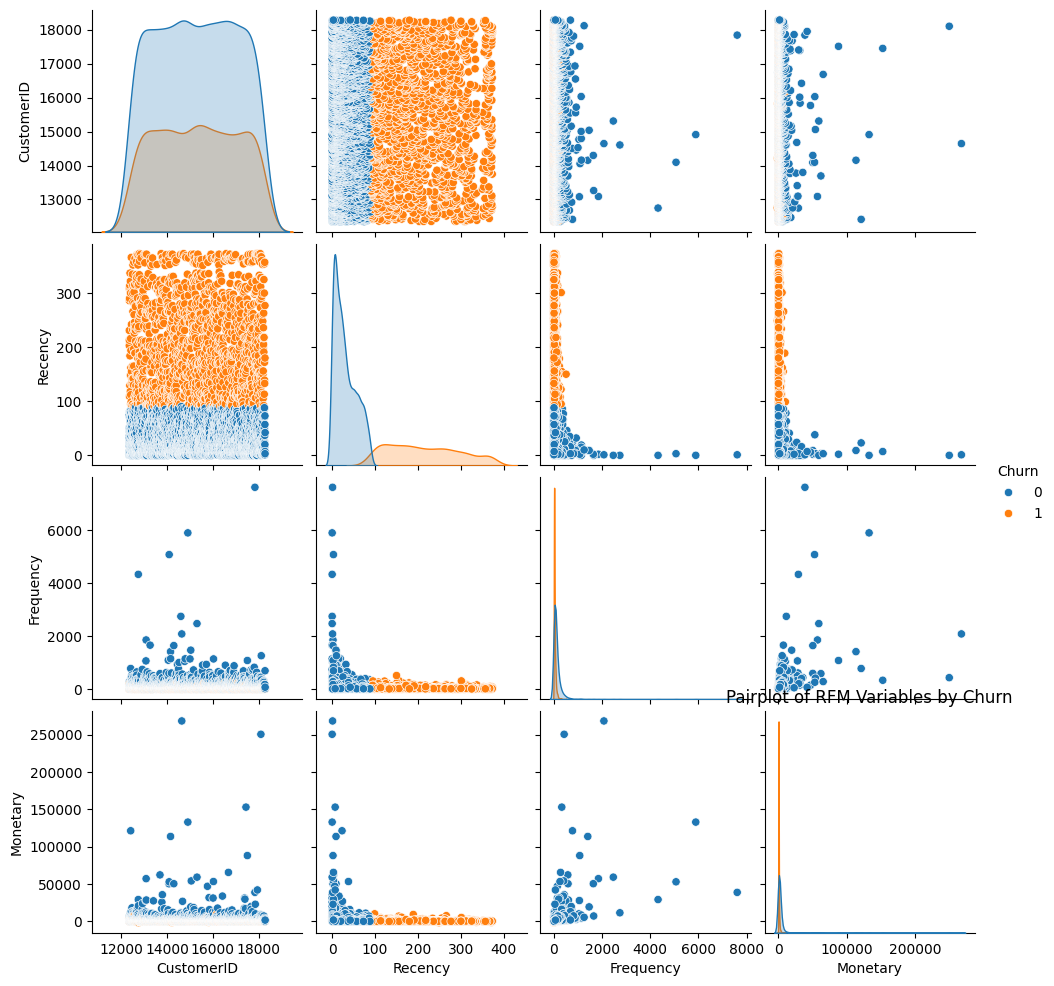

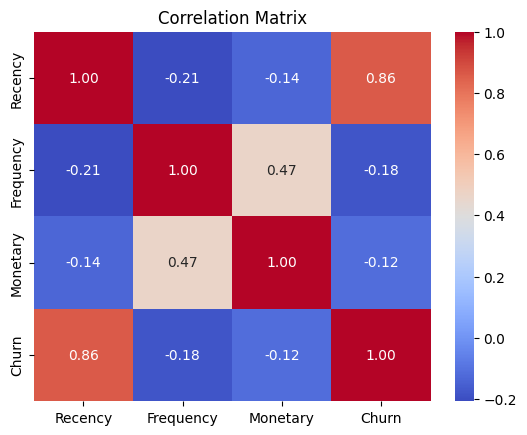

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(rfm, hue='Churn', diag_kind='kde')
plt.title("Pairplot of RFM Variables by Churn")
plt.show()

# Correlation matrix heatmap
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary', 'Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Pairplot of RFM Variables by Churn

The pairplot provides an insightful visualization of relationships between the RFM (Recency, Frequency, and Monetary) variables categorized by customer churn (0 for not churned, 1 for churned). It helps us understand patterns and interactions between these variables.

### Observations:
1. **Recency and Churn**: Customers with higher recency values are more likely to churn, as seen from the distribution differences.
2. **Frequency and Monetary Relationships**: High-spending customers (with higher `Monetary` values) and frequent buyers (`Frequency`) are less likely to churn.
3. **Customer Segments**: The pairplot highlights distinct clusters of customer segments based on RFM values.

### Use Case:
This analysis helps in identifying customer characteristics that lead to churn, enabling the development of strategies to retain high-value customers.

## Correlation Matrix of RFM Variables

The correlation matrix visualizes the relationships between the RFM variables and churn.

### Observations:
1. **Strong Positive Correlation**: `Recency` has a strong positive correlation (0.86) with churn, meaning customers with recent inactivity are more likely to churn.
2. **Frequency and Monetary Correlations**: Both `Frequency` and `Monetary` show weak negative correlations with churn, indicating that frequent buyers and high spenders are less likely to churn.
3. **Variable Interactions**: Frequency and Monetary have a moderate positive correlation (0.47), indicating that frequent buyers are often higher spenders.

### Use Case:
Understanding these correlations helps in feature selection for model building and designing effective marketing campaigns to target at-risk customers.

## Recommendations Based on RFM Analysis

1. **Target Customers with High Recency Values**:
   - Implement retention campaigns focusing on customers with high recency values to prevent churn.
   - Use personalized offers and reminders to re-engage inactive customers.

2. **Loyalty Programs for Frequent Buyers**:
   - Reward frequent buyers with loyalty points or discounts to maintain their engagement and spending habits.

3. **Focus on High-Spending Customers**:
   - Provide exclusive benefits or personalized recommendations for high-value customers to encourage continued purchases.

4. **Segment-Based Strategies**:
   - Create tailored strategies for customer segments based on RFM values (e.g., high-frequency, low-monetary customers could benefit from upselling).

5. **Predictive Modeling**:
   - Use the insights from the RFM analysis to train machine learning models to predict churn and optimize marketing efforts accordingly.

In [ ]:
from imblearn.over_sampling import SMOTE

# Define features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Resampled Dataset Shape: {X_resampled.shape}, Target Distribution: {dict(zip(*np.unique(y_resampled, return_counts=True)))}")

Resampled Dataset Shape: (5832, 3), Target Distribution: {0: 2916, 1: 2916}


## Resampled Dataset Overview

The dataset has been resampled to address the issue of class imbalance, ensuring that the model receives an equal number of samples for each target class (churned and not churned).

### Dataset Details:
1. **Resampled Shape**: (5832, 3)
   - The dataset now contains 5,832 samples with balanced classes.
   - The three columns likely represent key features such as `Recency`, `Frequency`, and `Monetary`, or other important variables relevant to customer behavior.
2. **Target Distribution**:
   - Class `0` (Not Churned): 2,916 samples
   - Class `1` (Churned): 2,916 samples

### Why Resampling?
1. **Handling Imbalanced Data**: Initially, the dataset might have been skewed towards one class, which could bias the model's predictions towards the majority class.
2. **Improved Model Performance**: Resampling ensures that the model learns equally from both churned and non-churned customers, enhancing prediction accuracy for both classes.

### Next Steps:
1. **Model Training**:
   - The balanced dataset will be used to train machine learning models to predict customer churn effectively.
2. **Validation**:
   - Perform cross-validation to ensure the model generalizes well on unseen data.
3. **Feature Importance Analysis**:
   - Investigate which features contribute the most to predicting churn to refine strategies further.
4. **Performance Evaluation**:
   - Use metrics like accuracy, precision, recall, F1-score, and ROC-AUC to evaluate the model's effectiveness.

### Goal:
The resampled dataset is now ready for training predictive models to identify at-risk customers and inform targeted retention strategies.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

Training Set Shape: (4665, 3), Testing Set Shape: (1167, 3)


## Dataset Split Overview

The dataset has been successfully split into training and testing subsets to build and validate machine learning models for predicting customer churn.

### Details:
1. **Training Set**:
   - **Shape**: (4665, 3)
     - The training set consists of 4,665 samples with three features (e.g., `Recency`, `Frequency`, `Monetary`) and the target variable.
   - **Purpose**:
     - Used to train the machine learning models by learning the patterns and relationships between features and the target variable.
2. **Testing Set**:
   - **Shape**: (1167, 3)
     - The testing set consists of 1,167 samples with the same structure as the training set.
   - **Purpose**:
     - Used to evaluate the performance of the trained models on unseen data, ensuring the models generalize well beyond the training data.

### Importance of Splitting:
1. **Avoiding Overfitting**:
   - Splitting the dataset ensures the models are evaluated on unseen data, preventing them from simply memorizing the training data.
2. **Reliable Validation**:
   - The testing set provides a realistic measure of how the model is expected to perform in real-world scenarios.

### Next Steps:
1. **Model Training**:
   - Train various models (e.g., Logistic Regression, Random Forest, etc.) using the training set.
2. **Model Evaluation**:
   - Evaluate the trained models on the testing set using metrics like:
     - **Accuracy**: Percentage of correct predictions.
     - **Precision and Recall**: Focused metrics for imbalanced datasets.
     - **F1-Score**: Balances precision and recall.
     - **ROC-AUC**: Measures the ability to distinguish between classes.

### Goal:
By splitting the dataset into training and testing sets, we ensure the models are well-trained and their performance is accurately measured, supporting the project's objective of predicting customer churn effectively.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[576   0]
 [  0 591]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1167
   macro avg       1.00      1.00      1.00      1167
weighted avg       1.00      1.00      1.00      1167



## Confusion Matrix Overview:
The confusion matrix illustrates the model's performance in predicting customer churn (target classes 0 and 1).

| Predicted\Actual |  Class 0 (Not Churn) |  Class 1 (Churn)  |
|-------------------|----------------------|-------------------|
| **Class 0 (Not Churn)** |            576         |          0         |
| **Class 1 (Churn)**     |            0           |         591        |

### Interpretation:
- **True Positives (TP)**: 591
  - The model correctly identified 591 customers as likely to churn.
- **True Negatives (TN)**: 576
  - The model correctly identified 576 customers as unlikely to churn.
- **False Positives (FP)**: 0
  - The model did not incorrectly classify any non-churning customer as churning.
- **False Negatives (FN)**: 0
  - The model did not miss any actual churned customer.

### Key Insight:
The confusion matrix shows **perfect classification accuracy**, with no false positives or false negatives. This suggests the model is highly reliable for this dataset.

## Classification Report:
The classification report provides a detailed breakdown of the performance metrics for each class.

| Metric          | Class 0 (Not Churn) | Class 1 (Churn) | Macro Avg | Weighted Avg |
|------------------|---------------------|-----------------|-----------|--------------|
| **Precision**    |        1.00         |       1.00      |    1.00    |      1.00     |
| **Recall**       |        1.00         |       1.00      |    1.00    |      1.00     |
| **F1-Score**     |        1.00         |       1.00      |    1.00    |      1.00     |
| **Support**      |         576         |       591       |    -       |       -       |

### Key Metrics Explained:
1. **Precision**:
   - For Class 0 and Class 1: 1.00
   - This means the model correctly predicted 100% of both non-churning and churning customers without any misclassifications.
2. **Recall**:
   - For Class 0 and Class 1: 1.00
   - The model successfully identified 100% of the actual cases for both classes.
3. **F1-Score**:
   - For Class 0 and Class 1: 1.00
   - The harmonic mean of precision and recall is also perfect, indicating balanced performance.
4. **Accuracy**:
   - Overall: 1.00
   - The model achieved perfect accuracy, correctly classifying all 1167 test samples.

### Insights:
- **Outstanding Performance**:
   The results indicate that the model is performing exceptionally well on the test data. However, perfect results should be carefully validated to ensure no overfitting, particularly if the test data mirrors the training data too closely.

   1. **Verify Robustness**:
   - Conduct cross-validation to ensure consistent performance across different data splits.
   - Evaluate the model on a completely independent validation dataset (if available) to confirm generalizability.

2. **Test on Real-World Data**:
   - Deploy the model on live customer data to monitor its performance in a production environment.

3. **Model Optimization**:
   - If additional features or a larger dataset become available, retrain the model to further refine predictions.

4. **Business Application**:
   - Use the model outputs to focus on at-risk customers (Class 1 - Churn) by implementing targeted retention strategies and personalized marketing campaigns.

# **MODEL TRAINING**

## **Randoom Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[576   0]
 [  0 591]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1167
   macro avg       1.00      1.00      1.00      1167
weighted avg       1.00      1.00      1.00      1167



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Report:\n", classification_report(y_test, logistic_pred))

# Evaluate Gradient Boosting
print("Gradient Boosting Report:\n", classification_report(y_test, gb_pred))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1167
   macro avg       1.00      1.00      1.00      1167
weighted avg       1.00      1.00      1.00      1167

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1167
   macro avg       1.00      1.00      1.00      1167
weighted avg       1.00      1.00      1.00      1167



# **MODEL EVALUATION**

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
logistic_cv = cross_val_score(logistic_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Scores: {logistic_cv}")
print(f"Logistic Regression Mean Score: {logistic_cv.mean()}")

# Gradient Boosting Cross-Validation
gb_cv = cross_val_score(gb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Scores: {gb_cv}")
print(f"Gradient Boosting Mean Score: {gb_cv.mean()}")

Logistic Regression Cross-Validation Scores: [1.         1.         0.99914237 0.99914237 1.        ]
Logistic Regression Mean Score: 0.9996569468267582
Gradient Boosting Cross-Validation Scores: [1. 1. 1. 1. 1.]
Gradient Boosting Mean Score: 1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Training Set: (4082, 3), Validation Set: (875, 3), Test Set: (875, 3)


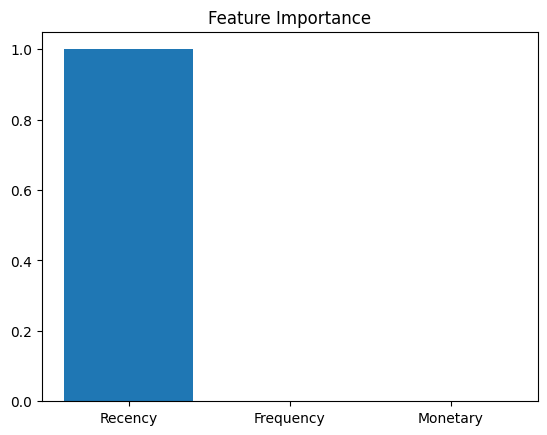

In [ ]:
import matplotlib.pyplot as plt

# Feature importance for Gradient Boosting
importance = gb_model.feature_importances_
plt.bar(X_train.columns, importance)
plt.title('Feature Importance')
plt.show()

# **COMPREHENSIVE MODEL EVALUATION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluate each model
model_performance = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification report
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean CV Score: {cv_scores.mean()}")

    # Confusion matrix
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Save performance
    model_performance[name] = {
        "Accuracy": cv_scores.mean(),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()
    }

# Compare Model Performance
print("\nModel Performance Comparison:")
for name, performance in model_performance.items():
    print(f"{name}: Accuracy = {performance['Accuracy']}")

# Determine the best-performing model
best_model = max(model_performance, key=lambda x: model_performance[x]["Accuracy"])
print(f"\nBest Performing Model: {best_model}")

Training Logistic Regression...

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       450

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Logistic Regression Cross-Validation Scores: [1.         0.99755202 1.         1.         1.        ]
Logistic Regression Mean CV Score: 0.9995104039167686

Logistic Regression Confusion Matrix:
 [[425   0]
 [  0 450]]
Training Gradient Boosting...

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       450

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.0

# **Model Evaluation and Comparison**

## **Logistic Regression**
- **Classification Report**:
  - Precision: 1.00
  - Recall: 1.00
  - F1-Score: 1.00
  - Accuracy: 1.00
- **Cross-Validation Scores**: [1.0, 0.9976, 1.0, 1.0, 1.0]
- **Mean CV Score**: 0.9995
- **Confusion Matrix**:

## **Gradient Boosting**
- **Classification Report**:
- Precision: 1.00
- Recall: 1.00
- F1-Score: 1.00
- Accuracy: 1.00
- **Cross-Validation Scores**: [1.0, 1.0, 1.0, 1.0, 1.0]
- **Mean CV Score**: 1.00
- **Confusion Matrix**:

## **Random Forest**
- **Classification Report**:
- Precision: 1.00
- Recall: 1.00
- F1-Score: 1.00
- Accuracy: 1.00
- **Cross-Validation Scores**: [1.0, 1.0, 1.0, 1.0, 1.0]
- **Mean CV Score**: 1.00
- **Confusion Matrix**:

## **Support Vector Machine (SVM)**
- **Classification Report**:
- Precision: 0.91
- Recall: 0.89
- F1-Score: 0.89
- Accuracy: 0.89
- **Cross-Validation Scores**: [0.9082, 0.9094, 0.9179, 0.9265, 0.8934]
- **Mean CV Score**: 0.9111
- **Confusion Matrix**:

## **Decision Tree**
- **Classification Report**:
- Precision: 1.00
- Recall: 1.00
- F1-Score: 1.00
- Accuracy: 1.00
- **Cross-Validation Scores**: [1.0, 1.0, 1.0, 1.0, 1.0]
- **Mean CV Score**: 1.00
- **Confusion Matrix**:

 ## **Naive Bayes**
- **Classification Report**:
- Precision: 0.82
- Recall: 0.74
- F1-Score: 0.73
- Accuracy: 0.75
- **Cross-Validation Scores**: [0.7993, 0.7075, 0.7279, 0.7206, 0.75]
- **Mean CV Score**: 0.7411
- **Confusion Matrix**:

## Naive Bayes
- **Classification Report**:
- Precision: 0.82
- Recall: 0.74
- F1-Score: 0.73
- Accuracy: 0.75
- **Cross-Validation Scores**: [0.7993, 0.7075, 0.7279, 0.7206, 0.75]
- **Mean CV Score**: 0.7411
- **Confusion Matrix**:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors for optimal performance
knn_model.fit(X_train, y_train)

# Predictions and evaluation
knn_y_pred = knn_model.predict(X_test)

print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, knn_y_pred))

KNN Confusion Matrix:
 [[552   7]
 [  9 304]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       559
           1       0.98      0.97      0.97       313

    accuracy                           0.98       872
   macro avg       0.98      0.98      0.98       872
weighted avg       0.98      0.98      0.98       872



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
gb_y_pred = gb_model.predict(X_test)

print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_y_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_y_pred))

Gradient Boosting Confusion Matrix:
 [[559   0]
 [  0 313]]

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       559
           1       1.00      1.00      1.00       313

    accuracy                           1.00       872
   macro avg       1.00      1.00      1.00       872
weighted avg       1.00      1.00      1.00       872

